In [1]:
#Librerias necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

## Cargamos el dataset

In [2]:
#Cargamos el dataset limpio del TP 1
data = pd.read_csv('dataset_caba.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.rename(columns={'place_name_normalized':'place', 'property_type':'ptype'}, inplace=True)
data.sample(3)

,ptype,place_name,lat-lon,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,...,disposicion,aAstrenar,garage,balcon,piscina,sum,patio,lavadero,amenities,parrilla
2479,PH,Villa Crespo,"-34.5954285,-58.4485304",-34.595428,-58.448530,140000.0,61.0,58.0,2295.081967,1.0,...,frente,0,0,1,0,0,0,0,0,0
5020,apartment,Mataderos,"-34.6535127539,-58.5069369229",-34.653513,-58.506937,140000.0,58.0,48.0,2413.793103,0.0,...,frente,0,0,1,0,1,0,0,0,1
4407,apartment,Congreso,"-34.6200261,-58.3884668",-34.620026,-58.388467,75000.0,43.0,38.0,1744.186047,4.0,...,contrafrente,1,0,1,0,1,0,0,0,1


In [3]:
data.dropna(inplace=True)

---
### Análisis correlación

In [4]:
#Análisis de correlación entre variables
data.corr()

,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,aAstrenar,garage,balcon,piscina,sum,patio,lavadero,amenities,parrilla
lat,1.000000,-0.177002,0.225752,0.076871,0.076004,0.452463,-0.047622,-0.038468,0.027353,0.120976,0.041363,0.091362,0.035882,0.005404,-0.015424,0.062201,-0.011095
lon,-0.177002,1.000000,0.070819,0.083746,0.089270,-0.006117,0.041219,0.046773,-0.105611,-0.074815,-0.106835,-0.024917,-0.070203,0.008146,-0.001671,-0.006370,-0.093197
price,0.225752,0.070819,1.000000,0.834485,0.823267,0.281287,-0.000828,0.505998,-0.083344,0.210609,0.118551,0.049471,0.064849,0.081461,0.138247,0.035608,0.022367
surface_total_in_m2,0.076871,0.083746,0.834485,1.000000,0.954146,-0.124299,-0.026440,0.602504,-0.118983,0.091462,0.099802,-0.058199,-0.004676,0.133437,0.123032,-0.049251,-0.007522
surface_covered_in_m2,0.076004,0.089270,0.823267,0.954146,1.000000,-0.075644,-0.001754,0.638743,-0.126968,0.091065,0.093149,-0.076419,-0.021166,0.112941,0.135445,-0.046788,-0.048958
price_usd_per_m2,0.452463,-0.006117,0.281287,-0.124299,-0.075644,1.000000,0.058342,-0.147843,0.104879,0.280996,0.077853,0.312732,0.186072,-0.094436,0.028919,0.242085,0.113316
floor,-0.047622,0.041219,-0.000828,-0.026440,-0.001754,0.058342,1.000000,0.036923,0.016022,-0.011941,0.071167,0.008147,0.021717,-0.102255,0.071161,-0.016272,-0.010706
rooms,-0.038468,0.046773,0.505998,0.602504,0.638743,-0.147843,0.036923,1.000000,-0.178969,-0.033911,0.054805,-0.163521,-0.111894,0.152619,0.146330,-0.136228,-0.160496
aAstrenar,0.027353,-0.105611,-0.083344,-0.118983,-0.126968,0.104879,0.016022,-0.178969,1.000000,0.115881,0.097214,0.089006,0.122055,-0.057664,-0.079296,0.088529,0.143475
garage,0.120976,-0.074815,0.210609,0.091462,0.091065,0.280996,-0.011941,-0.033911,0.115881,1.000000,0.168458,0.341413,0.324473,-0.059123,0.090688,0.303455,0.259313


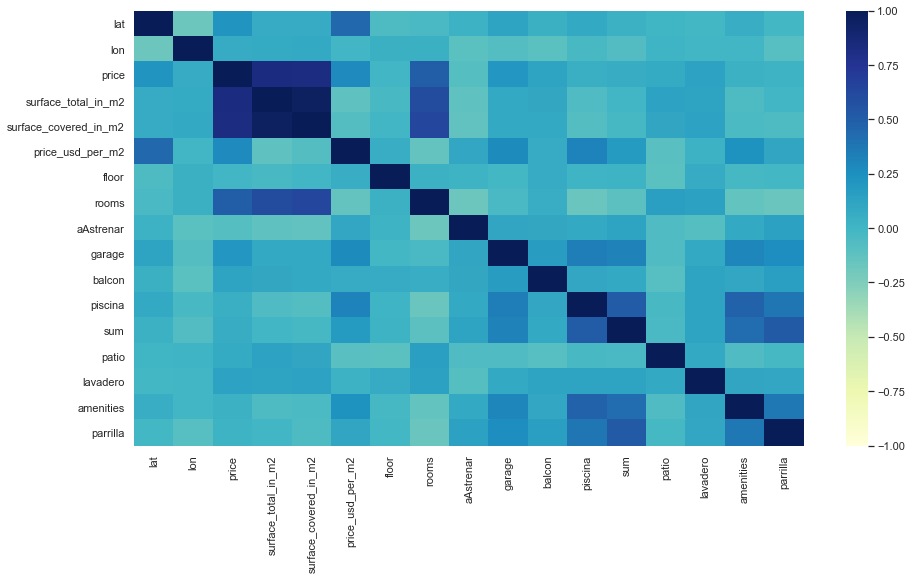

In [5]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

---
## Pre-Training
### Manejo variables categóricas

In [6]:
categoricas = ['place','ptype','disposicion']

data_dummies=pd.get_dummies(data[categoricas], drop_first = True)
data_dummies

,place_Almagro,place_Balvanera,place_Barracas,place_Belgrano,place_Boca,place_Boedo,place_Caballito,place_Chacarita,place_Coghlan,place_Colegiales,...,place_Villa Real,place_Villa Riachuelo,place_Villa Santa Rita,place_Villa Soldati,place_Villa Urquiza,place_Villa del Parque,ptype_apartment,ptype_house,disposicion_frente,disposicion_lateral
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6397,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [7]:
#Concateno
variables_extras=['price_usd_per_m2','floor','rooms','aAstrenar','garage']
data_normalizada = pd.concat([data[variables_extras],data_dummies], axis = 1)
data_normalizada = data_normalizada.reset_index(drop=True)
data_normalizada.head(3)

,price_usd_per_m2,floor,rooms,aAstrenar,garage,place_Almagro,place_Balvanera,place_Barracas,place_Belgrano,place_Boca,...,place_Villa Real,place_Villa Riachuelo,place_Villa Santa Rita,place_Villa Soldati,place_Villa Urquiza,place_Villa del Parque,ptype_apartment,ptype_house,disposicion_frente,disposicion_lateral
0,1309.090909,3.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1812.500000,2.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1702.127660,1.0,5.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [8]:
#Genero mi variable X
X=data_normalizada.drop('price_usd_per_m2',axis=1)

---
## Modelo 1
### OMS

In [9]:
#Genero la variable y
y = data_normalizada['price_usd_per_m2']

In [10]:
#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100,shuffle=True)

In [11]:
#Entrenamos modelo OLS
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

#Predecimos
X_test_sm = sm.add_constant(X_test)
sm_prediction = model.predict(X_test_sm)

#Summary
print(model.summary())
print ('MAE:', mean_absolute_error(y_test, sm_prediction))
print ('MSE:', mean_squared_error(y_test, sm_prediction))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, sm_prediction)))

                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     57.49
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:16:25   Log-Likelihood:                -33990.
No. Observations:                4480   AIC:                         6.809e+04
Df Residuals:                    4425   BIC:                         6.844e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

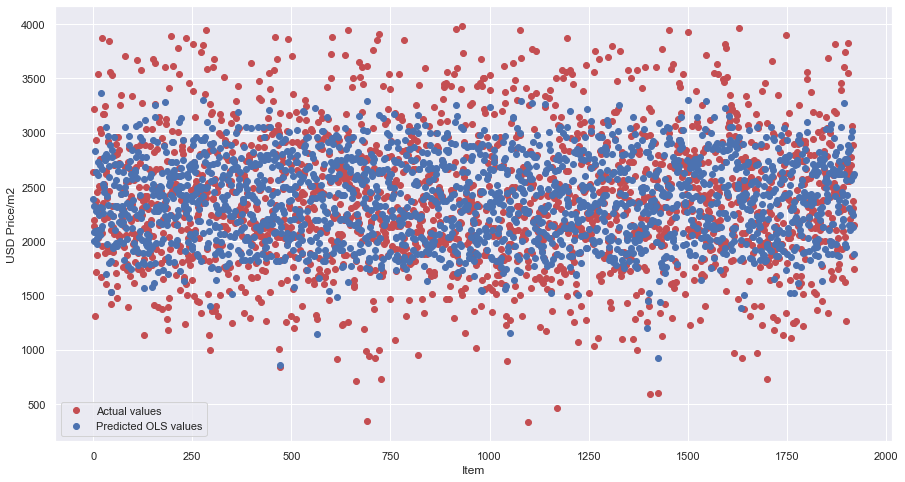

In [12]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test, 'ro', label="Actual values")
plt.plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values")

# showing the plotting of lasso regression
plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.show()

---
#### LASSO

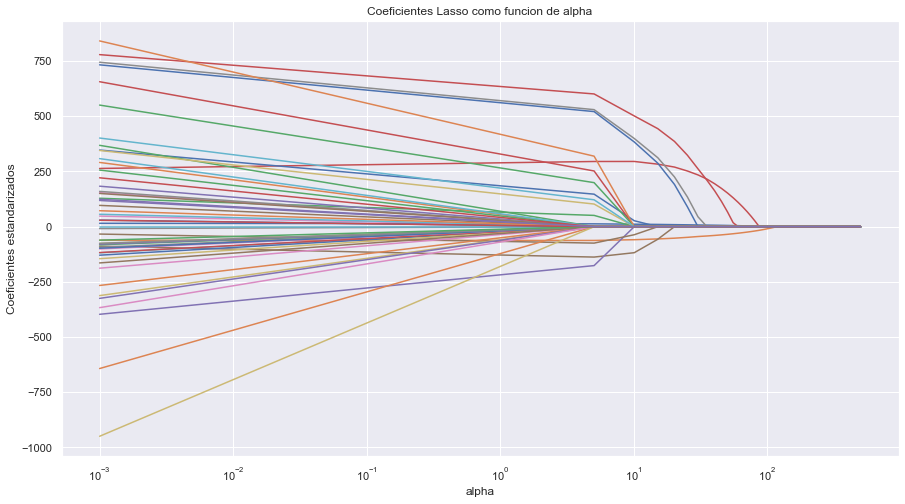

In [13]:
#Análisis previo de los alpha
alphas = np.linspace(0.001,500,100)
lasso = linear_model.Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Lasso como funcion de alpha');

In [14]:
#Creamos el modelo
lassocv = linear_model.LassoCV(alphas=None,normalize=False,cv=10,random_state=10, max_iter=10000)
#Lo entrenamos
model1_lasso_cv = lassocv.fit(X_train, y_train)
#Lo probamos
model1l_prediction = model1_lasso_cv.predict(X_test)

print("Alpha:",model1_lasso_cv.alpha_)
print ('MAE:', mean_absolute_error(y_test, model1l_prediction))
print ('MSE:', mean_squared_error(y_test, model1l_prediction))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, model1l_prediction)))
print("R2:",model1_lasso_cv.score(X_train, y_train))
pd.Series(lassocv.coef_, index=X.columns)

Alpha: 0.11841238719565338
MAE: 359.1838344938402
MSE: 223203.6474247777
RMSE: 472.4443326200217
R2: 0.4120048911488241


floor                         15.234519
rooms                        -61.398541
aAstrenar                    126.307352
garage                       265.214276
place_Almagro                169.336649
place_Balvanera              -98.033768
place_Barracas                22.702735
place_Belgrano               731.191072
place_Boca                   -79.763766
place_Boedo                 -117.884906
place_Caballito              333.754356
place_Chacarita              272.632307
place_Coghlan                343.344315
place_Colegiales             638.349944
place_Constitución          -400.294689
place_Flores                 -43.010471
place_Floresta              -179.925201
place_Liniers                 -6.787620
place_Mataderos             -308.973494
place_Monserrat               40.644099
place_Monte Castro          -122.044907
place_Nueva Pompeya         -260.745788
place_Nuñez                  533.876391
place_Palermo                766.589804
place_Parque Avellaneda     -304.964266


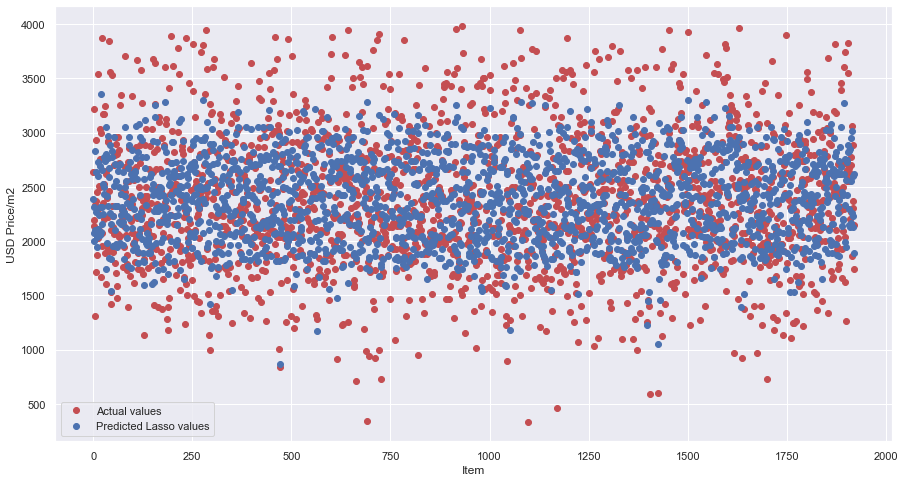

In [15]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test,'ro', label="Actual values")
plt.plot([i for i in range(len(y_test))],model1l_prediction,'bo', label="Predicted Lasso values")

# showing the plotting of lasso regression
plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.show()

---
### Ridge

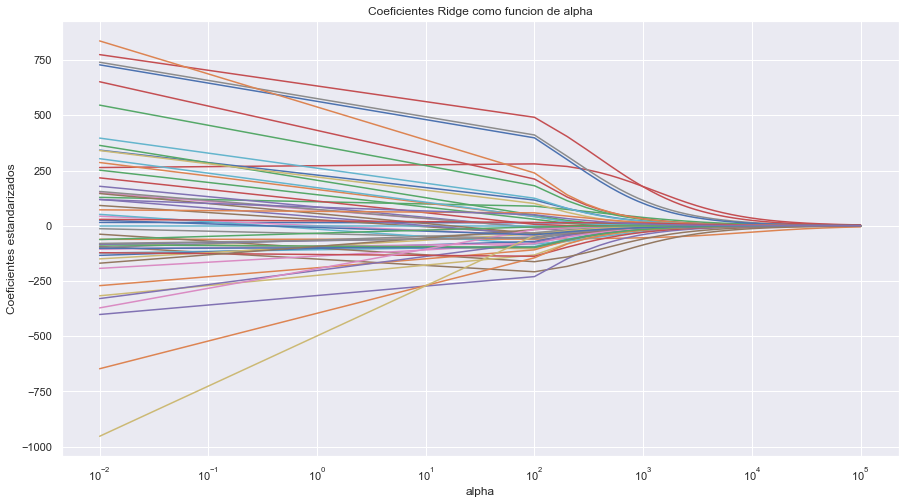

In [16]:
#Análisis previo de los alpha
alphas = np.linspace(0.01,100000,1000)
ridge = linear_model.Ridge(max_iter=10000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Ridge como funcion de alpha');

In [17]:
#Creamos el modelo
ridgecv = linear_model.RidgeCV(alphas=np.linspace(0.001,100,1000),normalize=False,cv=10)
#Lo entrenamos
model1_ridge_cv = ridgecv.fit(X_train, y_train)
#Lo probamos
model1r_prediction = model1_ridge_cv.predict(X_test)

print("Alpha:",model1_ridge_cv.alpha_)
print ('MAE:', mean_absolute_error(y_test, model1r_prediction))
print ('MSE:', mean_squared_error(y_test, model1r_prediction))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, model1r_prediction)))
print("R2:",model1_ridge_cv.score(X_train, y_train))
pd.Series(ridgecv.coef_, index=X.columns)

Alpha: 1.001990990990991
MAE: 359.05859453445504
MSE: 223151.92960005603
RMSE: 472.3895951437288
R2: 0.4121290051566119


floor                         15.305748
rooms                        -61.421098
aAstrenar                    127.912342
garage                       264.963016
place_Almagro                116.867797
place_Balvanera             -153.693371
place_Barracas               -17.389255
place_Belgrano               676.413516
place_Boca                  -140.454389
place_Boedo                 -180.426747
place_Caballito              280.122608
place_Chacarita              222.088164
place_Coghlan                294.895440
place_Colegiales             583.525079
place_Constitución          -455.790917
place_Flores                 -99.086790
place_Floresta              -245.221054
place_Liniers                -72.833031
place_Mataderos             -367.685243
place_Monserrat               -9.807895
place_Monte Castro          -188.569445
place_Nueva Pompeya         -321.831823
place_Nuñez                  479.981900
place_Palermo                711.991323
place_Parque Avellaneda     -368.972001


In [18]:
print ('MSE:', mean_squared_error(y_test, model1r_prediction))
print ('MSE:', mean_squared_error(y_train, model1_ridge_cv.predict(X_train)))

MSE: 223151.92960005603
MSE: 227871.4473223073


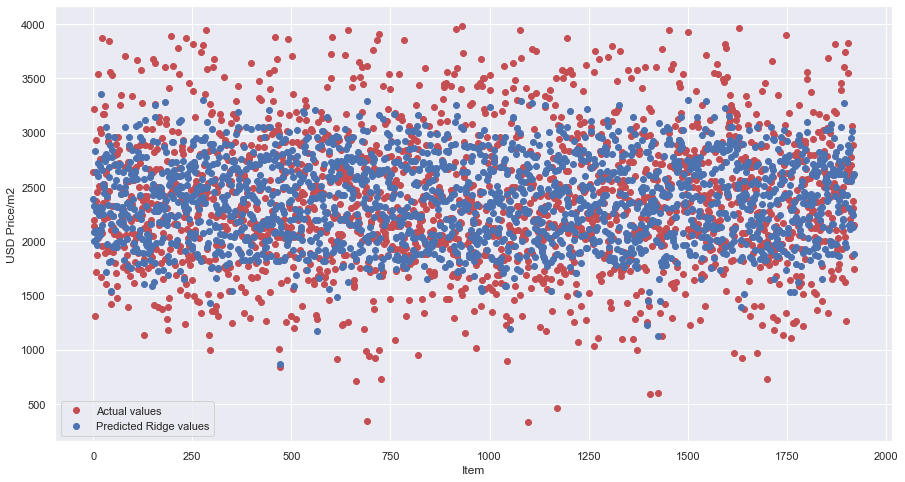

In [19]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test,'ro', label="Actual values")
plt.plot([i for i in range(len(y_test))],model1r_prediction,'bo', label="Predicted Ridge values")

# showing the plotting of lasso regression
plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.show()

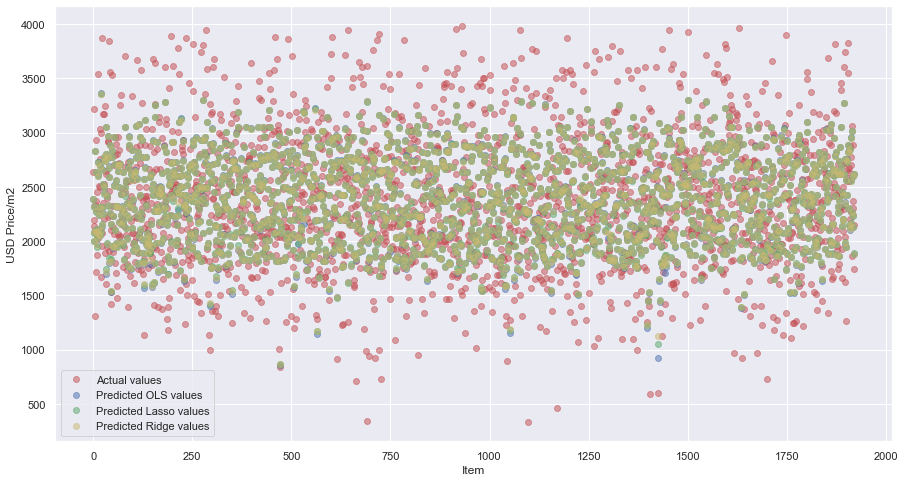

In [20]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],model1l_prediction, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],model1r_prediction, 'yo', label="Predicted Ridge values",alpha=0.5)

# showing the plotting of lasso regression
plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score

def print_metrics(y_real,y_pred):
    print('MAE:', round(mean_absolute_error(y_real, y_pred),2))
    print('MSE:', round(mean_squared_error(y_real, y_pred),2))
    print('RMSE:', round(np.sqrt(mean_squared_error(y_real, y_pred)),2))
    print('R2:', round(r2_score(y_real, y_pred),2))
    
    

Para el train set:
MAE: 366.3
MSE: 227800.37
RMSE: 477.28
R2: 0.41
------------------------------
Para el test set:
MAE: 359.04
MSE: 223149.75
RMSE: 472.39
R2: 0.42
------------------------------


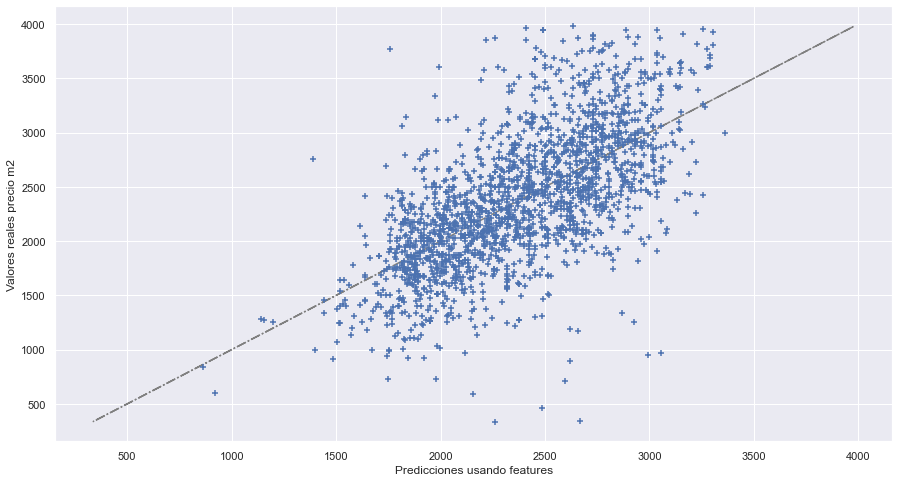

[0.41836387 0.44089868 0.37262758 0.35193521 0.39644359]


In [24]:
lm = linear_model.LinearRegression()

model_linreg = lm.fit(X_train, y_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg.predict(X_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg.predict(X_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(y_test,y_pred_ts_lm)
print("------------------------------")


plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(y_pred_ts_lm, y_test, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()

print(cross_val_score(model_linreg, X_train, y_train, cv=5))  

Para el train set:
MAE: 366.3
MSE: 227800.37
RMSE: 477.28
R2: 0.41
------------------------------
Para el test set:
MAE: 359.04
MSE: 223149.75
RMSE: 472.39
R2: 0.42
------------------------------


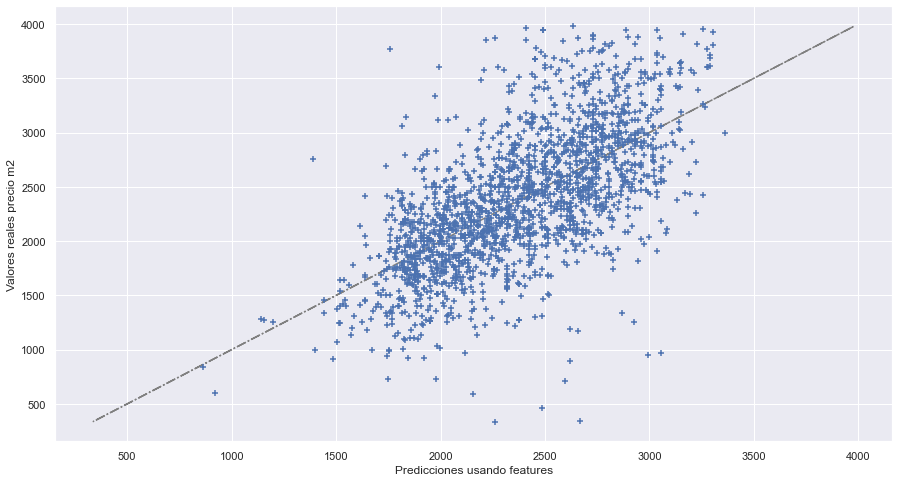

[0.41856094 0.44090063 0.3726635  0.35201824 0.39645822]


In [25]:
stdscalerX = StandardScaler()

Xs_train = stdscalerX.fit_transform(X_train)
ys_train = y_train

Xs_test = stdscalerX.transform(X_test)
ys_test = y_test

model_linreg_std = lm.fit(Xs_train,ys_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_std.predict(Xs_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_std.predict(Xs_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(ys_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(ys_test,y_pred_ts_lm)
print("------------------------------")

plt.plot(ys_test,ys_test, '-.', c='grey')
plt.scatter(y_pred_ts_lm, ys_test, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()

print(cross_val_score(model_linreg_std, Xs_train, ys_train, cv=5)) 

In [26]:
from sklearn.preprocessing import MinMaxScaler

minmaxscalerX = MinMaxScaler()

Xn_train = minmaxscalerX.fit_transform(X_train)
yn_train = y_train

Xn_test = minmaxscalerX.transform(X_test)
yn_test = y_test

model_linreg_n = lm.fit(Xn_train,yn_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_n.predict(Xn_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_n.predict(Xn_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(yn_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(yn_test,y_pred_ts_lm)
print("------------------------------")

print(cross_val_score(model_linreg_n, Xn_train, yn_train, cv=5))

Para el train set:
MAE: 366.3
MSE: 227800.37
RMSE: 477.28
R2: 0.41
------------------------------
Para el test set:
MAE: 359.04
MSE: 223149.75
RMSE: 472.39
R2: 0.42
------------------------------
[0.41835388 0.44089868 0.3726162  0.35190656 0.39644497]
